In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

from pandas import DataFrame
from scipy import io
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [6]:
### GET ALL MY FEATURES AND CLASSES FROM CSV ###
### AND PERFORM TRAIN, VALID, AND TEST SPLIT ###
data = DataFrame()
data = pd.read_csv("emotions2.csv", header=None, low_memory=False)

test, valid, train = np.split(data, [int(2132 * 0.2), int(2132 * 0.4)])

x_train = train.iloc[:,0:2547]
y_train = train.iloc[:,2548]

x_valid = valid.iloc[:,0:2547]
y_valid = valid.iloc[:,2548]

x_test = test.iloc[:,0:2547]
y_test = test.iloc[:,2548]

In [ ]:
### SET UP MY RCF MODEL, LOOKING AT VALIDATION ACCURACY VS FEATURES ###
MAX_FEAT = 1
train_accuracy = np.zeros(40)
valid_accuracy = np.zeros(40)
features = np.zeros(40)

for i in range (40):
    RFC = RandomForestClassifier(n_estimators=100, min_samples_split=3, max_features=MAX_FEAT)
    RFC.fit(x_train, y_train)

    # Print train accuracy
    print("MAX FEATURES: ", MAX_FEAT)
    print("train accuracy: ", accuracy_score(RFC.predict(x_train), y_train))
    print("valid accuracy: ", accuracy_score(RFC.predict(x_valid), y_valid))
    
    train_accuracy[i] = accuracy_score(RFC.predict(x_train), y_train)
    valid_accuracy[i] = accuracy_score(RFC.predict(x_valid), y_valid)
    features[i] = MAX_FEAT
    
    MAX_FEAT = MAX_FEAT + 1

In [ ]:
# Plot results
print("train accuracy plot")
plt.scatter(features, train_accuracy, s=1)
plt.show()
print("valid accuracy plot")
plt.scatter(features, valid_accuracy, s=1)
plt.show()

Valid accuracy:  0.9882629107981221
Confusion Matrix: 0 = NEG / 1 = NEU / 2 = POS


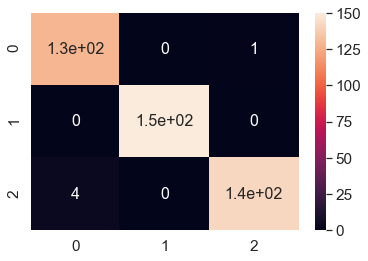

In [9]:
### CONFUSION MATRIX WITH 25 MAX FEATURES
RFC = RandomForestClassifier(n_estimators=100, min_samples_split=3, max_features=25)
RFC.fit(x_train, y_train)
cm = confusion_matrix(y_valid, RFC.predict(x_valid))
print("Valid accuracy: ", accuracy_score(RFC.predict(x_valid), y_valid))

# Output visually
print("Confusion Matrix: 0 = NEG / 1 = NEU / 2 = POS")
df_cm = pd.DataFrame(cm, range(3), range(3))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})